In [34]:
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from helpers import plot_populations


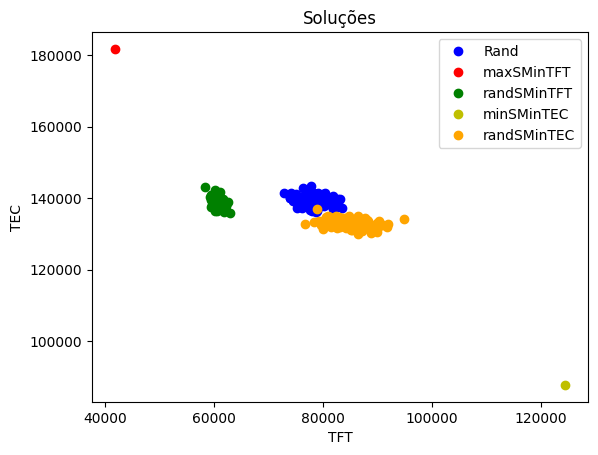

In [35]:

def get_points_from_file(path):
    x_array = []
    y_array = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar='\'')
        next(reader, None)
        for row in reader:
            #print(row)
            x_array.append(float(row[1]))
            y_array.append(float(row[2]))

    return x_array, y_array


x_array_tft_rand, y_array_tec_rand = get_points_from_file('pop_output.csv')
x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft = get_points_from_file('max_s_min_tft.csv')
x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft = get_points_from_file('rand_s_min_tft.csv')
x_array_tft_min_s_min_tec, y_array_tec_min_s_min_tec = get_points_from_file('min_s_min_tec.csv')
x_array_tft_rand_s_min_tec, y_array_tec_rand_s_min_tec = get_points_from_file('rand_s_min_tec.csv')


fig, ax = plt.subplots(1, 1)
ax.plot(x_array_tft_rand, y_array_tec_rand, 'bo', markersize=6, label="Rand")
ax.plot(x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft, marker='o', linestyle="None", color='red', markersize=6, label="maxSMinTFT")
ax.plot(x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft, 'go', markersize=6, label="randSMinTFT")
ax.plot(x_array_tft_min_s_min_tec, y_array_tec_min_s_min_tec, 'yo', markersize=6, label="minSMinTEC")
ax.plot(x_array_tft_rand_s_min_tec, y_array_tec_rand_s_min_tec, marker ='o', linestyle="None", color="orange", markersize=6, label="randSMinTEC")
ax.legend()
ax.set_title('Soluções')
ax.set_xlabel('TFT')
ax.set_ylabel('TEC')
plt.show()

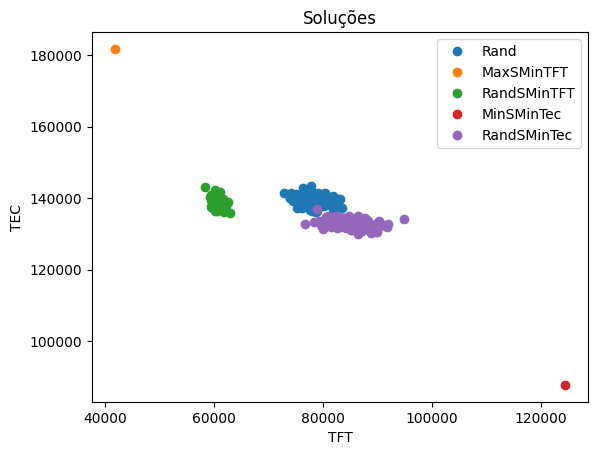

In [36]:
files = ['pop_output.csv', 'max_s_min_tft.csv', 'rand_s_min_tft.csv', 'min_s_min_tec.csv', 'rand_s_min_tec.csv']

labels = ['Rand', 'MaxSMinTFT', 'RandSMinTFT', 'MinSMinTec', 'RandSMinTec']

plot_populations(files, labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


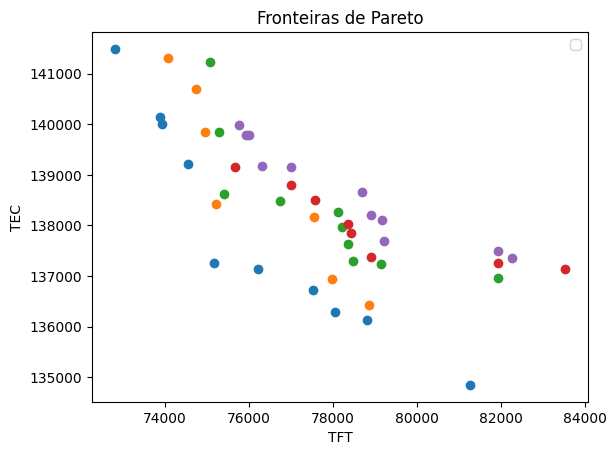

In [37]:

cmap = cm.get_cmap('jet', 5)
gantt_colors = [colors.to_hex(cmap(i)) for i in range(40)]


def get_points_from_file(path):
    population = []
    for i in range(5):
        population.append({'x': [], 'y': []})

    x_array = []
    y_array = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar='\'')
        next(reader, None)

        for row in reader:
            if int(row[3]) <= 5:
                #print(row)
                population[int(row[3]) - 1]['x'].append(float(row[1]))
                population[int(row[3]) - 1]['y'].append(float(row[2]))
    return population


population = get_points_from_file('pop_output.csv')
fig, ax = plt.subplots(1, 1)

for level in population:
    ax.plot(level['x'], level['y'], 'o', markersize=6)

ax.legend()
ax.set_title('Fronteiras de Pareto')
ax.set_xlabel('TFT')
ax.set_ylabel('TEC')
plt.show()
